In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
plt.style.use('dark_background')

In [5]:
df = pd.read_csv("dataset.csv")
print(len(df))

540364


In [10]:
df['date'] = pd.to_datetime(df.date)
df = df.sort_values(by='date')
def create_year_column(row):
    if row['date'].year == 2017:
        return 2017
    else:
        return 2016


df['year'] = df.apply(create_year_column, axis=1)

In [6]:
above_24_degrees = df[df['temperature'] > 23.9]
below_24_degrees = df[df['temperature'] < 23.9]

In [7]:
len(above_24_degrees)

881

## Temperature

<AxesSubplot:ylabel='temperature'>

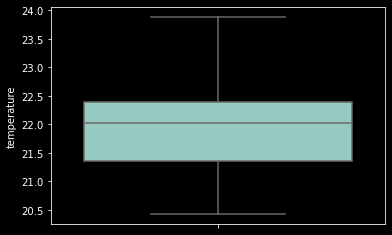

In [8]:
sns.boxplot(y="temperature", data=below_24_degrees)

In [9]:
sns.boxplot(y="temperature", data=below_24_degrees, x="room", hue="year")

ValueError: Could not interpret input 'year'

In [ ]:
below_24_degrees = below_24_degrees[below_24_degrees['temperature'] < 23.9]
only_room_0 = below_24_degrees[below_24_degrees['room'] == "A"]
sns.boxplot(y="temperature", data=only_room_0)

In [ ]:
below_23_degrees = only_room_0[only_room_0['temperature'] < 22.8]
print(len(below_23_degrees))
sns.boxplot(y="temperature", data=below_23_degrees)

In [ ]:
only_room_2 = below_24_degrees[below_24_degrees['room'] == "C"]
sns.boxplot(y="temperature", data=only_room_2)

In [ ]:
below_225_degrees = only_room_2[only_room_2['temperature'] < 22.53]
above = below_225_degrees[below_225_degrees['temperature'] > 21.9]
print(len(above))
sns.boxplot(y="temperature", data=above)

In [ ]:
room0 = below_24_degrees[below_24_degrees.room == "A"]
below_23_degrees = room0[room0['temperature'] < 22.8]

room2 = below_24_degrees[below_24_degrees.room == "C"]
below_225_degrees = room2[room2['temperature'] < 22.53]
below_225_degrees = below_225_degrees[below_225_degrees['temperature'] > 21.9]

room_1_2 = below_24_degrees[below_24_degrees.room == "B"]
frames = [room_1_2, below_23_degrees, below_225_degrees]

result = pd.concat(frames)
print(len(df))
print(len(result))
sns.boxplot(y="temperature", data=result, x="room", hue="year")

In [ ]:
result = result[result['temperature'] < 23.85]
sns.boxplot(y="temperature", data=result)

## relative_humidity

In [ ]:
sns.boxplot(y="relative_humidity", data=result, x="room", hue="year")

In [ ]:
relative_result = result[result['relative_humidity'] < 65]
print(len(df))
print(len(relative_result))
sns.boxplot(y="relative_humidity", data=relative_result)

## mean_temp_day

In [ ]:
mean_remp_result = relative_result[relative_result['mean_temp_day'] > 0.0]
print(len(df))
print(len(mean_remp_result))
sns.boxplot(x="mean_temp_day", data=mean_remp_result)

## heatindex

In [ ]:
heat_index_result = mean_remp_result[mean_remp_result['heatindex'] < 23.12]
print(len(df))
print(len(heat_index_result))
sns.boxplot(x="heatindex", data=heat_index_result)

## light_sensor_one_wavelength

In [ ]:
ligsensor_result = mean_remp_result[mean_remp_result['light_sensor_one_wavelength'] < 302]
print(len(df))
print(len(ligsensor_result))
sns.boxplot(x="light_sensor_one_wavelength", data=ligsensor_result)

## lightsensor_two_wavelength

In [ ]:
ligsensor_result_two = ligsensor_result[ligsensor_result['light_sensor_two_wavelength'] < 1163]
print(len(df))
print(len(ligsensor_result_two))
sns.boxplot(x="light_sensor_two_wavelength", data=ligsensor_result_two)

## number_occupants

In [ ]:
print(len(df))
print(len(ligsensor_result_two))
sns.boxplot(x="number_occupants", data=ligsensor_result_two)

## activity_occupants

In [ ]:
print(len(df))
print(len(ligsensor_result_two))
sns.boxplot(x="activity_occupants", data=ligsensor_result_two)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Dense Boxplots')
sns.boxplot(ax=axes[0,0],x="heatindex", data=ligsensor_result_two)
sns.boxplot(ax=axes[0,1],x="mean_temp_day", data=ligsensor_result_two)
sns.boxplot(ax=axes[0,2],x="temperature", data=ligsensor_result_two)
sns.boxplot(ax=axes[1,0],x="relative_humidity", data=ligsensor_result_two)
sns.boxplot(ax=axes[1,1],x="light_sensor_one_wavelength", data=ligsensor_result_two)
sns.boxplot(ax=axes[1,2],x="light_sensor_two_wavelength", data=ligsensor_result_two)